# Actividad De Profundización

Integrantes:

**Juan Manuel Ochoa Serna**

**Cristhian Ricardo Sepúlveda Montaño**

Ingenierías software, Fundación Universitaria Compensar

Inteligencia Artificial

Docente:

Luisa Graciela Arciniegas Zamora

9 de noviembre de 2025

Bogotá D.C., Colombia

# Exploración inicial de los datos

Para nuestro primer bloque de codigo importamos las librerias **Pandas**, **Matplotlib** y **Seaborn** de las cuales usaremos funciones de lectura y renderizado de graficos

In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos en la variable archivo
archivo = "BASE DE DATOS DIABETES (3).xlsx"

# Leer archivo y almacenar en dataframe
df = pd.read_excel(archivo, engine='openpyxl')

# Shape para longitud y ancho del dataframe
print("Filas y Columnas:", df.shape)

# Head para mostrar las primeras 10 filas y display para tabla formateada
display(df.head(10))

# Ciclo para imprimir todos los nombres de las columnas
print("\nNombre columnas:")
for c in df.columns:
    print(c)

# Contar valores nulos por columna
df.isna().sum()

Filas y Columnas: (768, 10)


,#,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
5,5,5,116,74,0,0,25.6,0.201,30,0
6,6,3,78,50,32,88,31.0,0.248,26,1
7,7,10,115,0,0,0,35.3,0.134,29,0
8,8,2,197,70,45,543,30.5,0.158,53,1
9,9,8,125,96,0,0,0.0,0.232,54,1



Nombre columnas:
#
Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


#                           0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Luego continuamos con la limpieza de de los titulos y los datos

In [2]:
# Strip para quitar espacios antes y despues y replace para cambiar espacios por guiones bajos
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

# Mapa para renombrar columnas y abreviar
rename_map = {
    'Age': 'Age',
    'Glucose': 'Glucose',
    'BloodPressure': 'BloodPressure',
    'Insulin': 'Insulin',
    'BMI': 'BMI',
    'DiabetesPedigreeFunction': 'DPF'
}

# Renombrar columnas usando las clave valor del mapa
df = df.rename(columns={k:v for k,v in rename_map.items() if k in df.columns})

# Eliminar filas con todos los valores NaN y resetear el indice
df = df.dropna(how='all').reset_index(drop=True) # how='any' para eliminar si hay algun NaN en la fila

# Head para mostrar las primeras 10 filas y display para tabla formateada
display(df.head(10))

# Info para los tipos de datos por columna
print("\nInfo:")
print(df.info())

# Describe para resumen estadístico
print("\nResumen estadístico:")
display(df.describe())

,#,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
5,5,5,116,74,0,0,25.6,0.201,30,0
6,6,3,78,50,32,88,31.0,0.248,26,1
7,7,10,115,0,0,0,35.3,0.134,29,0
8,8,2,197,70,45,543,30.5,0.158,53,1
9,9,8,125,96,0,0,0.0,0.232,54,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   #              768 non-null    int64  
 1   Pregnancies    768 non-null    int64  
 2   Glucose        768 non-null    int64  
 3   BloodPressure  768 non-null    int64  
 4   SkinThickness  768 non-null    int64  
 5   Insulin        768 non-null    int64  
 6   BMI            768 non-null    float64
 7   DPF            768 non-null    float64
 8   Age            768 non-null    int64  
 9   Outcome        768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB
None

Resumen estadístico:


,#,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# Agrupamos las variables y forzamos convercion a numerica, forzando errores a NaN
num_cols = ['Glucose', 'Age','Pregnancies', 'BloodPressure','Insulin','BMI','DPF']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


# Contar valores nulos por columna
display(df[num_cols].isna().sum())

# Mostrar filas con valores nulos en las columnas numericas
display(df[df[num_cols].isna().any(axis=1)]) # axis=0 para columnas, axis=1 para filas

Glucose          0
Age              0
Pregnancies      0
BloodPressure    0
Insulin          0
BMI              0
DPF              0
dtype: int64

,#,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome


In [ ]:
# Contar valores CERO (0) en las columnas numericas
cero_mask = (df[num_cols] == 0)

# sumar los valores CERO por columna
conteo_de_ceros = cero_mask.sum()

# mostrar el conteo de valores CERO por columna
print("Conteo de valores CERO (0) por columna:")
print(conteo_de_ceros)

Conteo de valores CERO (0) por columna:
Glucose            5
Age                0
Pregnancies      111
BloodPressure     35
Insulin          374
BMI               11
DPF                0
dtype: int64


In [ ]:
# importar numpy para manejo de NaN
import numpy as np

# Reemplazar valores CERO (0) por NaN en las columnas especificadas
cols_to_modify = ['Glucose', 'BloodPressure', 'Insulin', 'BMI']

# Reemplazar 0 por NaN
df[cols_to_modify] = df[cols_to_modify].replace(0, np.nan)

# Hallar la mediana y rellenar los NaN con la mediana de cada columna
for col in cols_to_modify:
    median_cols = df[col].median()
    print(col, median_cols)
    df[col].fillna(median_cols, inplace=True)

# Verificar que no queden NaN en las columnas modificadas
display(df[cols_to_modify].isna().sum())

Glucose 117.0
BloodPressure 72.0
Insulin 125.0
BMI 32.3


C:\Users\juan-\AppData\Local\Temp\ipykernel_4828\825716296.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_cols, inplace=True)
C:\Users\juan-\AppData\Local\Temp\ipykernel_4828\825716296.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

Glucose          0
BloodPressure    0
Insulin          0
BMI              0
dtype: int64

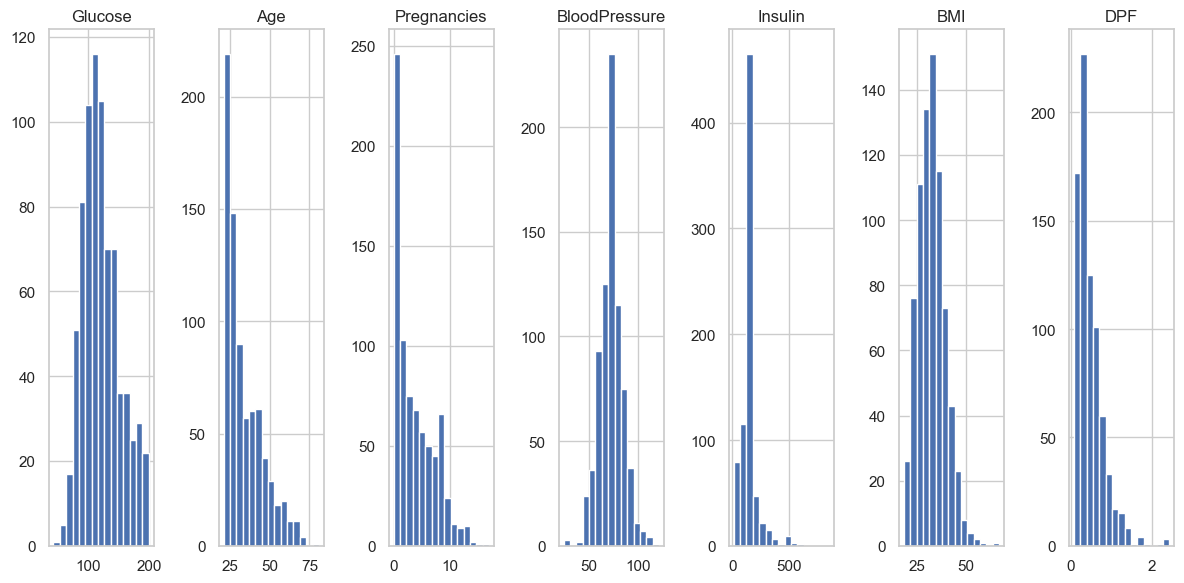

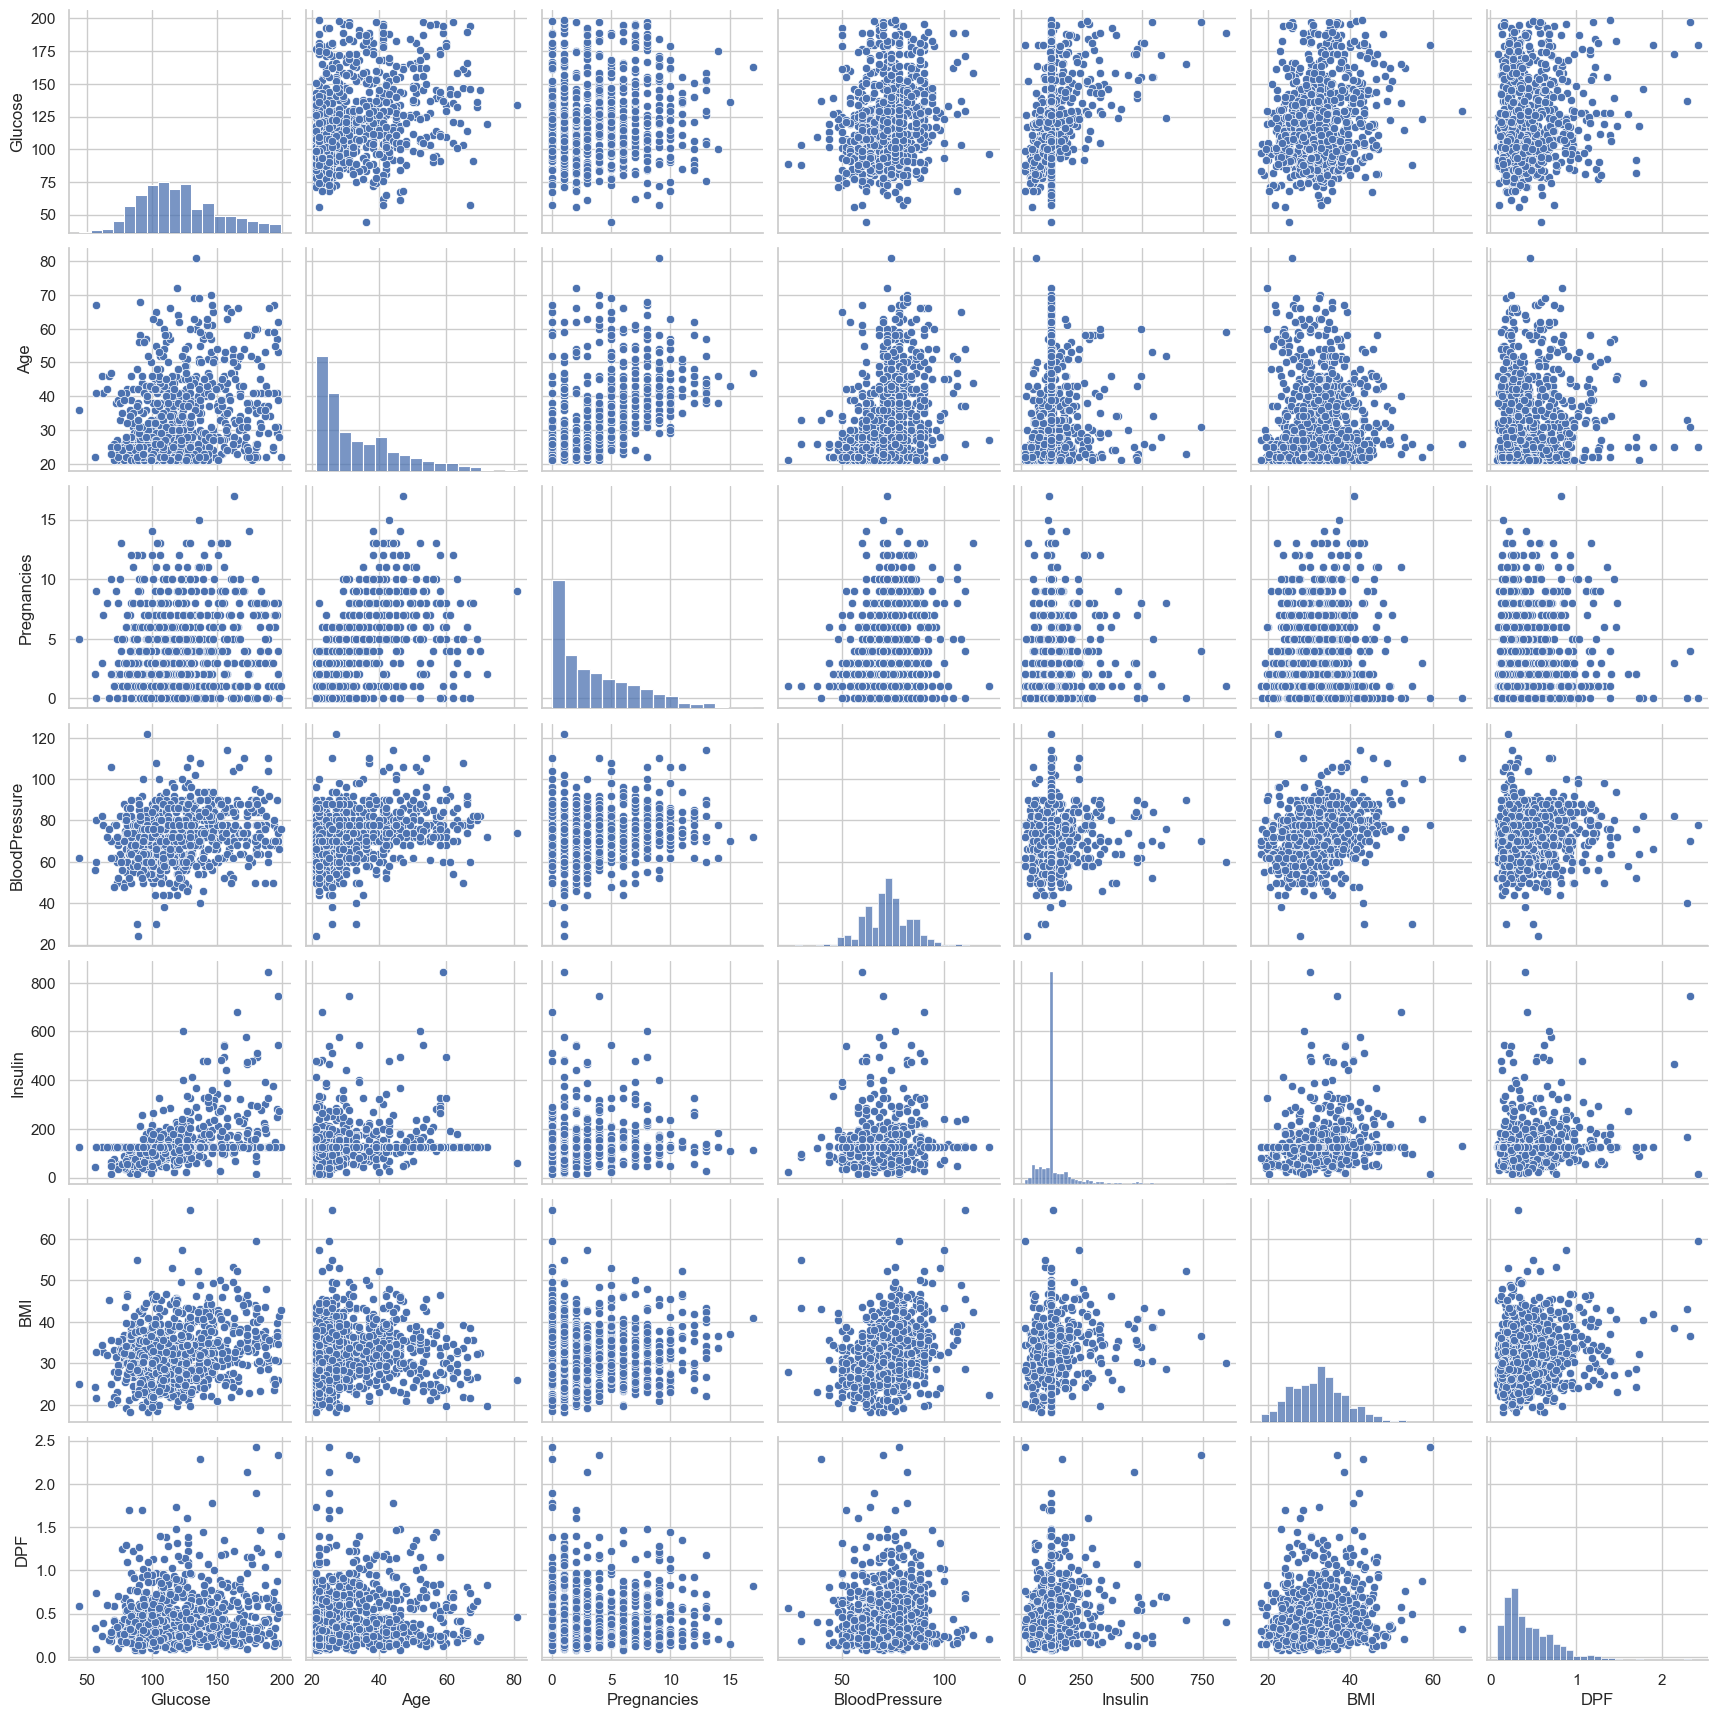

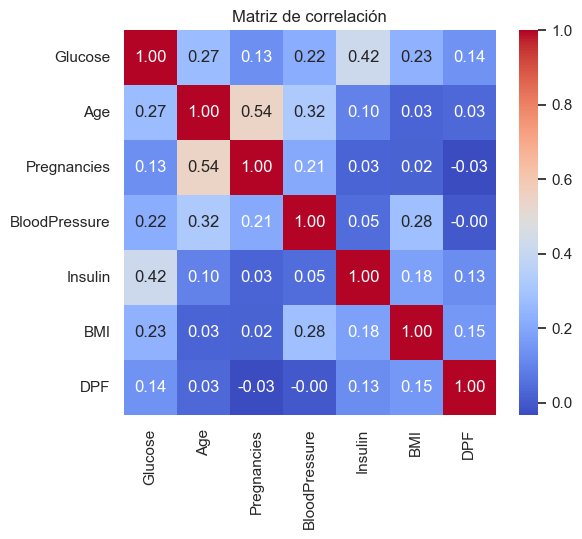

In [6]:
# Enviamos un estilo especifico a los graficos
sns.set(style="whitegrid")

# Histogramas para variables numericas
df[num_cols].hist(bins=15, figsize=(12,6), layout=(1,len(num_cols)))
plt.tight_layout()
plt.show()

# Pairplot para ver relaciones entre variables con diagrama de dispersion
sns.pairplot(df[num_cols].dropna())
plt.show()

# Heatmap para matriz de correlacion
plt.figure(figsize=(6,5))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

# Definición de la variable objetivo (target)

Para este análisis elegimos (columna `Glucose`) como variable dependiente continua. 
Motivos:
- El objetivo del ejercicio es modelar el **riesgo de diabetes** a partir de indicadores biométricos y el nivel promedio de glucosa es una medida numérica directa asociada al riesgo.
- Al ser una variable numérica continua, permite el uso de modelos de regresión (regresión lineal) que son interpretables y adecuados para datasets de tamaño moderado.

Alternativa: transformar `Glucose` en categorías (ej. 'bajo', 'normal', 'alto') para hacer clasificación. Esa alternativa requeriría usar modelos de clasificación (Logistic Regression, Decision Trees, etc.) y cambiar las métricas de evaluación.


In [ ]:
# Almacenar variable y mostrar resumen
target_col = "Glucose"

print("Resumen Glucosa:")

# Describimos info estadistica de la variable objetivo
display(df[target_col].describe())

Resumen Glucosa:


count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

# Justificación del uso de Regresión Lineal

Usamos **Regresión Lineal** porque:
- La variable objetivo (`Glucose`) es **numérica continua**, que es la condición primaria para regresión lineal.
- La variable `Outcome` es categórica binaria (0 = no diabético, 1 = diabético) lo que cambiaria el enfoque a un modelo de clasificacion.
- La regresión lineal es **simple e interpretable**: los coeficientes indican la dirección y magnitud del efecto de cada predictor sobre la glucosa.
- Para un dataset con un número moderado de observaciones y variables, la regresión lineal permite detectar rápidamente variables relevantes y sirve como punto de referencia.

# Selección de variables predictoras (X) y variable objetivo (y)

- **Segun una de las alternativas brindadas por la docente usaremos todas las variables numéricas:** usar todas las columnas biométricas disponibles (Age, Pregnancies, BloodPressure, Insulin, BMI, DPF).



In [19]:
# Creamos lista de variables y comprobamos que existan en el dataframe
possible_predictors = ['Age','Pregnancies','BloodPressure','Insulin','BMI','DPF']
X_cols = [c for c in possible_predictors if c in df.columns]

# Almacenar x e y
x = df[X_cols].copy()
y = df[target_col].copy()

print("Varibles Predictoras:", X_cols)
display(x.head(10))

Varibles Predictoras: ['Age', 'Pregnancies', 'BloodPressure', 'Insulin', 'BMI', 'DPF']


,Age,Pregnancies,BloodPressure,Insulin,BMI,DPF
0,50,6,72.0,125.0,33.6,0.627
1,31,1,66.0,125.0,26.6,0.351
2,32,8,64.0,125.0,23.3,0.672
3,21,1,66.0,94.0,28.1,0.167
4,33,0,40.0,168.0,43.1,2.288
5,30,5,74.0,125.0,25.6,0.201
6,26,3,50.0,88.0,31.0,0.248
7,29,10,72.0,125.0,35.3,0.134
8,53,2,70.0,543.0,30.5,0.158
9,54,8,96.0,125.0,32.3,0.232


# Escalado / Normalización

Para este caso y teniendo en cuenta que no usaremos modelos dee clasificacion, no realizamos escalado


# División del dataset en entrenamiento y prueba

Dividimos el dataset en 70% entrenamiento y 30% prueba.


In [ ]:
# Importamos funcion para hacer el split del df
from sklearn.model_selection import train_test_split

# Hacemos el split del dataframe en train y test con 30% para test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Imprimimos los tamaños de los datasets resultantes 70/30
print("Tamaños:")
print(f"x_train: {x_train.shape}\n"
      f"x_test: {x_test.shape}\n"
      f"y_train: {y_train.shape}\n"
      f"y_test: {y_test.shape}")

Tamaños:
x_train: (537, 6)
x_test: (231, 6)
y_train: (537,)
y_test: (231,)


# Entrenamiento del modelo: LinearRegression

Entrenamos un modelo de regresión lineal sobre los datos de entrenamiento. 
Mostraremos los coeficientes para interpretar el impacto de cada variable sobre Glucose.


In [ ]:
# Importamos el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo con x e y train
model = LinearRegression()
model.fit(x_train, y_train)

# Coeficientes con nombres de variables
coefs = pd.Series(model.coef_, index=x.columns).sort_values(key=abs, ascending=False)

# Intercepto, valor que predice para 'y' cuando todas las variables predictoras x son iguales a cero.
intercept = model.intercept_

# Imprimimos intercepto y coeficientes ordenados por magnitud, aplicando valor absoluto sin negativos
print("Intercept:", intercept)
print("\nCoeficientes ordenados por magnitud (abs):")
display(coefs)

# Predicción de ejemplo
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

Intercept: 45.49273328638503

Coeficientes ordenados por magnitud (abs):


DPF              8.309106
BMI              0.613574
Age              0.490579
BloodPressure    0.258683
Insulin          0.126536
Pregnancies      0.009808
dtype: float64

# Criterios de elección del modelo

Elegimos **LinearRegression** por las siguientes razones:
- **Tipo de variable:** el target (`Glucose`) es numérico y continuo, por lo que un modelo de regresión es apropiado.
- **Interpretabilidad:** los coeficientes del modelo lineal permiten interpretar la dirección (positiva/negativa) y magnitud relativa del efecto de cada predictor x.
- **Tamaño del dataset:** para este caso, un datasets de tamaño moderado y con pocas columnas, un modelo lineal es apropiado y evita sobreajuste en comparacion con otros modelos mas complejos.
- **Punto de referencia:** la regresión lineal sirve como línea base; si su desempeño es insuficiente podemos probar modelos más complejos (árboles, ensemble, etc.).


# Evaluación del modelo

Usamos las métricas sugeridas:
- MAE (Mean Absolute Error): error absoluto medio.
- MSE (Mean Squared Error): error cuadrático medio.
- RMSE: raíz cuadrada del MSE, en mismas unidades que el target.
- R²: proporción de varianza explicada.


In [ ]:
# Función para calcular e imprimir métricas de regresión
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Función para imprimir métricas de regresión
def print_regression_metrics(y_true, y_pred, label="Test"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"Métricas ({label}):")
    print(f"MAE : {mae:.4f}")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")
    # retornamos un diccionario (k,v) con las métricas
    return {'MAE':mae,'MSE':mse,'RMSE':rmse,'R2':r2}

# Calculamos e imprimimos métricas para train y test
metrics_train = print_regression_metrics(y_train, y_pred_train, label="Train")
metrics_test  = print_regression_metrics(y_test,  y_pred_test,  label="Test")

Métricas (Train):
MAE : 19.5235
MSE : 657.0313
RMSE: 25.6326
R²  : 0.2755
Métricas (Test):
MAE : 21.8467
MSE : 738.3955
RMSE: 27.1734
R²  : 0.2368


# Resumen de hallazgos

- Modelo entrenado: **LinearRegression** para predecir `Glucose`.
- Intercept (constante): **45.4927** - valor base del modelo cuando todas las variables predictoras toman valor 0.
- Coeficientes (ordenados por magnitud absoluta):
  - `DPF`: **8.3091**
  - `BMI`: **0.6136**
  - `Age`: **0.4906**
  - `BloodPressure`: **0.2587**
  - `Insulin`: **0.1265**
  - `Pregnancies`: **0.0098**
- Métricas de desempeño:
  - **Train**: MAE = **19.52**, RMSE = **25.63**, R² = **0.2755**
  - **Test** : MAE = **21.85**, RMSE = **27.17**, R² = **0.2368**

Interpretación general:
- El modelo lineal explica aproximadamente un **24–28%** de la variabilidad de `Glucose` (R² entre 0.24 y 0.28), por lo que **la mayor parte de la variación en glucosa no es explicada** por las variables actuales o por la relación lineal presente.
- Los errores absolutos medios (MAE = 20 - 22) y RMSE = 25 - 27 indican que las predicciones típicamente se equivocan en decenas de unidades de glucosa, lo que sugiere capacidad predictiva moderada-baja para usos clínicos sin mejoras adicionales.
- La diferencia entre train y test es pequeña (ligera caída de R² y aumento de error), lo que sugiere **poca sobreajuste severo** pero también que el modelo no generaliza de forma excelente.


# Reflexión sobre la variable de mayor impacto

- Según los coeficientes del modelo, **`DPF` (Diabetes Pedigree Function)** es la variable con mayor impacto en la predicción de `Glucose` (coeficiente = **8.31**). Esto significa que, **manteniendo constantes las demás variables**, un aumento de una unidad en `DPF` se asocia con un aumento aproximado de **8.3 unidades** en glucosa según el modelo lineal.
- **Importante:** la magnitud del efecto depende de la **escala** de cada variable. Si `DPF` varía en rangos pequeños (p. ej. 0.x), un cambio pequeño puede significar un efecto relevante en glucosa. Por el contrario, variables como `Pregnancies` muestran un coeficiente muy pequeño (**= 0.0098**), lo que sugiere un impacto prácticamente nulo en la predicción dentro del rango y codificación actual.
- Otras variables con impacto moderado: `BMI` (= 0.61) y `Age` (= 0.49) — ambas sugieren que aumentos en IMC o edad se asocian con aumentos modestos en glucosa.
- Conclusión práctica: **DPF parece ser el predictor más influyente** en este modelo lineal. Sin embargo, dada la baja R², conviene ser cauteloso: aunque `DPF` influye, **muchos otros factores no capturados o relaciones no lineales** también afectan la glucosa.

# Modelos recomendados si tuvieramos más datos individuales

Con más datos (más pacientes y/o más características por paciente), se abrirían mejores opciones para mejorar el rendimiento:

1. **Enfoque inmediato (mejoras sin cambiar mucho la metodología)**
   - **Regularización**: Ridge o Lasso para reducir varianza y manejar multicolinealidad.
   - **Ingeniería de features**: Tratamiento de outliers.

2. **Modelos no lineales y ensemble**
   - **RandomForestRegressor**: maneja no linealidades y relaciones complejas sin mucho preprocesamiento.
   - **Gradient Boosting** (XGBoost, LightGBM, CatBoost): suelen superar modelos lineales cuando hay relaciones no lineales e interacciones importantes; muy usados en problemas tabulares.
   - Ventaja: explicabilidad relativa (feature importances, SHAP) y mejor rendimiento con más datos.

3. **Modelos basados en redes neuronales**
   - **Redes neuronales profundas** solo si se dispone de grandes volúmenes de datos y muchas características.
   - Requieren mayor ajuste y riesgo de sobreajuste si los datos no son suficientes.

4. **Validación y robustez**
   - Con más datos conviene usar **validación cruzada (k-fold)**, búsqueda de hiperparámetros (Grid/Random/Optuna) y técnicas de ensamblado (stacking) para robustecer las predicciones.

5. **Si cambiamos el objetivo a `Outcome` (clasificación)**
   - Modelos recomendados: **Logistic Regression** (baseline), **RandomForestClassifier**, **GradientBoostingClassifier**; para producción, calibración de probabilidades y métricas como AUC-ROC, recall, precision.
   - Con más datos y variables, los modelos de boosting suelen ofrecer las mayores mejoras de rendimiento.

**Resumen:** con más datos individuales, lo más apropiado para regresión sería probar ensemble de árboles (Gradient Boosting / Random Forest) y técnicas de validación/hyperparameter tuning. Si además se añaden muchas características o datos no estructurados, considerar redes neuronales, siempre acompañadas de sólido pipeline de validación.
